## Segunda Práctica

A partir del csv con la muestra de tweets hacer lo siguiente:

1. Cargar en geodataframes la lista de agebs rurales y urbanos de la Ciudad de México
2. Plotear cada uno de los dataframes
3. Unir ambos dataframes con la función concat, por ejemplo:

urbano_rural_cdmx = gpd.pd.concat([agebs_urbanas, agebs_rurales])

4. Leer el archivo con los tweets de muestra creado en la práctica anterior.
5. Filtrar los tweets de la Ciudad de México
6. Agregar una columna para colocar la clave de ageb
7. Calcular el tamaño del dataframe que contiene los agebs rurales y urbanos de Ciudad de México
8. Definir una función que reciba los valores de latitud y longitud de los tweets y les asige la clave de ageb correspondiente
9. Definir una función que envíe los valores de latitud y longitud de los tweets a la funcion anterior
10. Calcular el número de procesadores que se tienen disponibles
11. Definir una función que divida el dataframe original en tantos datraframes como número de procesadores disponibles se tenga
12. Llamar a la función definida en el punto 11 y almacenar el dataframe resultante en un archivo csv.
13. Mostrar el head() del dataframe resultante.

In [ ]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely import wkt
from shapely.geometry import Polygon, Point
import numpy as np
from multiprocessing import Pool

In [ ]:
agebs_rurales = gpd.read_file('poligono_ageb_rurales_cdmx.shp')

In [ ]:
agebs_rurales.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_AGEB,geometry
0,090110471,09,011,0471,"POLYGON ((-98.99797 19.32698, -98.99294 19.326..."
1,090101326,09,010,1326,"POLYGON ((-99.27232 19.32381, -99.27222 19.323..."
2,090090539,09,009,0539,"POLYGON ((-99.10364 19.19843, -99.10340 19.198..."
3,090090524,09,009,0524,"POLYGON ((-99.05209 19.21711, -99.05200 19.216..."
4,090090115,09,009,0115,"POLYGON ((-99.14474 19.13402, -99.14467 19.134..."


<Axes: >

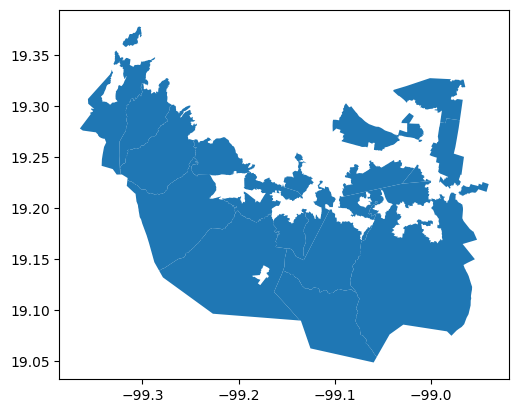

In [ ]:
agebs_rurales.plot()

In [ ]:
agebs_urbanos = gpd.read_file('poligono_ageb_urbanas_cdmx.shp')

In [ ]:
agebs_urbanos.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901000011716,09,010,0001,1716,"POLYGON ((-99.25882 19.32558, -99.25834 19.325..."
1,0901000012150,09,010,0001,2150,"POLYGON ((-99.19170 19.37893, -99.19170 19.378..."
2,0901000011133,09,010,0001,1133,"POLYGON ((-99.17760 19.35182, -99.17766 19.351..."
3,0901000011307,09,010,0001,1307,"POLYGON ((-99.20805 19.31277, -99.20768 19.312..."
4,0901000010281,09,010,0001,0281,"POLYGON ((-99.24228 19.38451, -99.24233 19.384..."


<Axes: >

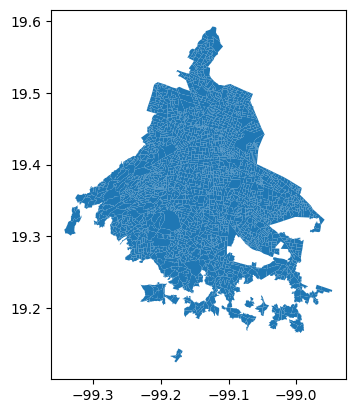

In [ ]:
agebs_urbanos.plot()

In [ ]:
urbano_rural_cdmx = gpd.pd.concat([agebs_urbanos, agebs_rurales])

In [ ]:
urbano_rural_cdmx.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901000011716,09,010,0001,1716,"POLYGON ((-99.25882 19.32558, -99.25834 19.325..."
1,0901000012150,09,010,0001,2150,"POLYGON ((-99.19170 19.37893, -99.19170 19.378..."
2,0901000011133,09,010,0001,1133,"POLYGON ((-99.17760 19.35182, -99.17766 19.351..."
3,0901000011307,09,010,0001,1307,"POLYGON ((-99.20805 19.31277, -99.20768 19.312..."
4,0901000010281,09,010,0001,0281,"POLYGON ((-99.24228 19.38451, -99.24233 19.384..."


<Axes: >

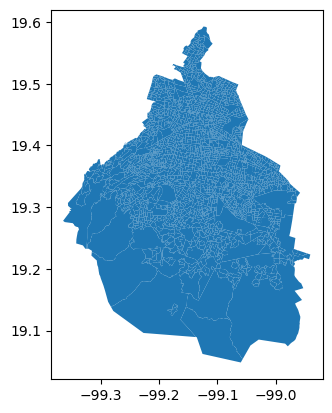

In [ ]:
urbano_rural_cdmx.plot()

In [ ]:
tweets_cdmx = pd.read_csv('data_cdmx.csv')
tweets_cdmx.head()

,Unnamed: 0,Text,Latitude,Longitude,Sentiment,label,clase,Estado
0,873257,@mc_pillin Que tengas un dia super genial hermosa,19.380613,-99.161480,positivo,0,No Depresión,Ciudad de México
1,402466,Bien fresita @ Parque La Mexicana https://t.co...,19.357952,-99.270457,positivo,0,No Depresión,Ciudad de México
2,237681,"El próximo 17, 18 y 19 estaremos en @Librelieb...",19.328383,-99.152340,positivo,0,No Depresión,Ciudad de México
3,34603,Muchas felicidades hijas...🎂🎂🎂 https://t.co/dP...,19.399101,-99.096496,positivo,0,No Depresión,Ciudad de México
4,847200,Entonces ahora que todos odian a la RAE y pien...,19.432836,-99.153366,neutro,0,No Depresión,Ciudad de México


In [ ]:
tweets_cdmx = tweets_cdmx.drop(['Unnamed: 0'], axis = 1)
tweets_cdmx.head()

,Text,Latitude,Longitude,Sentiment,label,clase,Estado
0,@mc_pillin Que tengas un dia super genial hermosa,19.380613,-99.161480,positivo,0,No Depresión,Ciudad de México
1,Bien fresita @ Parque La Mexicana https://t.co...,19.357952,-99.270457,positivo,0,No Depresión,Ciudad de México
2,"El próximo 17, 18 y 19 estaremos en @Librelieb...",19.328383,-99.152340,positivo,0,No Depresión,Ciudad de México
3,Muchas felicidades hijas...🎂🎂🎂 https://t.co/dP...,19.399101,-99.096496,positivo,0,No Depresión,Ciudad de México
4,Entonces ahora que todos odian a la RAE y pien...,19.432836,-99.153366,neutro,0,No Depresión,Ciudad de México


In [ ]:
tweets_cdmx.insert(7, 'CVE_AGEB', '', allow_duplicates=False)
tweets_cdmx.head()

,Text,Latitude,Longitude,Sentiment,label,clase,Estado,CVE_AGEB
0,@mc_pillin Que tengas un dia super genial hermosa,19.380613,-99.161480,positivo,0,No Depresión,Ciudad de México,
1,Bien fresita @ Parque La Mexicana https://t.co...,19.357952,-99.270457,positivo,0,No Depresión,Ciudad de México,
2,"El próximo 17, 18 y 19 estaremos en @Librelieb...",19.328383,-99.152340,positivo,0,No Depresión,Ciudad de México,
3,Muchas felicidades hijas...🎂🎂🎂 https://t.co/dP...,19.399101,-99.096496,positivo,0,No Depresión,Ciudad de México,
4,Entonces ahora que todos odian a la RAE y pien...,19.432836,-99.153366,neutro,0,No Depresión,Ciudad de México,


In [ ]:
size = len(urbano_rural_cdmx)
size

2453

In [ ]:
def dime_ageb(lat, lon):
    estado = 'NaN'
    point = Point(lon, lat)
    for i in range(size):
        try:
            pol = urbano_rural_cdmx['geometry'][i]
            if pol.contains(point):
                estado = urbano_rural_cdmx['CVE_AGEB'][i]
                print(estado)
                break
        except:
            pass
    return estado

In [ ]:
lat = 19.4326077
lon = -99.133208
dime_ageb(lat, lon)

0771


'0771'

In [ ]:
def convertir(tweets_cdmx):
    tweets_cdmx['CVE_AGEB'] = tweets_cdmx.apply(lambda x: dime_ageb(x['Latitude'], x['Longitude']), axis=1)
    return tweets_cdmx

In [ ]:
data = convertir(tweets_cdmx)

In [ ]:
data

,Text,Latitude,Longitude,Sentiment,label,clase,Estado,CVE_AGEB
0,@mc_pillin Que tengas un dia super genial hermosa,19.380613,-99.161480,positivo,0,No Depresión,Ciudad de México,0613
1,Bien fresita @ Parque La Mexicana https://t.co...,19.357952,-99.270457,positivo,0,No Depresión,Ciudad de México,0369
2,"El próximo 17, 18 y 19 estaremos en @Librelieb...",19.328383,-99.152340,positivo,0,No Depresión,Ciudad de México,0573
3,Muchas felicidades hijas...🎂🎂🎂 https://t.co/dP...,19.399101,-99.096496,positivo,0,No Depresión,Ciudad de México,1094
4,Entonces ahora que todos odian a la RAE y pien...,19.432836,-99.153366,neutro,0,No Depresión,Ciudad de México,0803
...,...,...,...,...,...,...,...,...
338,Todo eso???,19.432836,-99.153366,neutro,0,No Depresión,Ciudad de México,0803
339,@MetroCDMX la espera que se vive en los túnele...,19.453822,-99.170733,negativo,0,No Depresión,Ciudad de México,0088
340,"Lo mismo de siempre con las figuras públicas, ...",19.318042,-99.248009,negativo,0,No Depresión,Ciudad de México,0137
341,@OVIALCDMX CalzDeTlalpan rumbo Taxqueña este a...,19.328383,-99.152340,positivo,0,No Depresión,Ciudad de México,0573
